In [235]:
import pandas as pd

 # Conociendo el conjunto de datos

### SIGNIFICADO DE LAS COLUMNAS:

  - customerID:  número de identificación único de cada cliente
  - Churn: si el cliente dejó o no la empresa
  - gender: género (masculino y femenino)
  - SeniorCitizen: información sobre si un cliente tiene o no una edad igual o mayor a 65 años
  - Partner: si el cliente tiene o no una pareja
  - Dependents: si el cliente tiene o no dependientes
  - tenure: meses de contrato del cliente
  - PhoneService: suscripción al servicio telefónico
  - MultipleLines: suscripción a más de una línea telefónica
  - InternetService: suscripción a un proveedor de internet
  - OnlineSecurity: suscripción adicional de seguridad en línea
  - OnlineBackup: suscripción adicional de respaldo en línea
  - DeviceProtection: suscripción adicional de protección del dispositivo
  - TechSupport: suscripción adicional de soporte técnico, menor tiempo de espera
  - StreamingTV: suscripción de televisión por cable
  - StreamingMovies: suscripción de streaming de películas
  - Contract: tipo de contrato
  - PaperlessBilling: si el cliente prefiere recibir la factura en línea
  - PaymentMethod: forma de pago
  - Charges.Monthly: total de todos los servicios del cliente por mes
  - Charges.Total: total gastado por el cliente

In [236]:
df = pd.read_json('https://raw.githubusercontent.com/alura-cursos/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json')

### columnas a analizar
- tenure

- Contract

- Charges.Monthly

- Charges.Total

- TechSupport

- OnlineSecurity

- PaymentMethod

- PaperlessBilling

In [237]:
tenure = pd.json_normalize(df['customer'])['tenure']

In [238]:
account = pd.json_normalize(df['account'])

In [239]:
internet = pd.json_normalize(df['internet'])['InternetService']

In [240]:
support = pd.json_normalize(df['internet'])['TechSupport']

In [241]:
filtro = pd.concat([df['customerID'], df['Churn'], tenure, account, internet, support], axis=1)

In [242]:
filtro

,customerID,Churn,tenure,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,InternetService,TechSupport
0,0002-ORFBO,No,9,One year,Yes,Mailed check,65.60,593.3,DSL,Yes
1,0003-MKNFE,No,9,Month-to-month,No,Mailed check,59.90,542.4,DSL,No
2,0004-TLHLJ,Yes,4,Month-to-month,Yes,Electronic check,73.90,280.85,Fiber optic,No
3,0011-IGKFF,Yes,13,Month-to-month,Yes,Electronic check,98.00,1237.85,Fiber optic,No
4,0013-EXCHZ,Yes,3,Month-to-month,Yes,Mailed check,83.90,267.4,Fiber optic,Yes
...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,13,One year,No,Mailed check,55.15,742.9,DSL,Yes
7263,9992-RRAMN,Yes,22,Month-to-month,Yes,Electronic check,85.10,1873.7,Fiber optic,No
7264,9992-UJOEL,No,2,Month-to-month,Yes,Mailed check,50.30,92.75,DSL,No
7265,9993-LHIEB,No,67,Two year,No,Mailed check,67.85,4627.65,DSL,Yes


In [243]:
filtro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   tenure            7267 non-null   int64  
 3   Contract          7267 non-null   object 
 4   PaperlessBilling  7267 non-null   object 
 5   PaymentMethod     7267 non-null   object 
 6   Charges.Monthly   7267 non-null   float64
 7   Charges.Total     7267 non-null   object 
 8   InternetService   7267 non-null   object 
 9   TechSupport       7267 non-null   object 
dtypes: float64(1), int64(1), object(8)
memory usage: 567.9+ KB


# Comprobación de incoherencias en los datos

In [244]:
import numpy as np
filtro["Charges.Total"] = filtro["Charges.Total"].replace(' ', np.nan)
filtro["Charges.Total"] = filtro["Charges.Total"].astype(float)

In [245]:
filtro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   tenure            7267 non-null   int64  
 3   Contract          7267 non-null   object 
 4   PaperlessBilling  7267 non-null   object 
 5   PaymentMethod     7267 non-null   object 
 6   Charges.Monthly   7267 non-null   float64
 7   Charges.Total     7256 non-null   float64
 8   InternetService   7267 non-null   object 
 9   TechSupport       7267 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 567.9+ KB


In [246]:
filtro.isnull().sum() #Comprobando datos nulos

,0
customerID,0
Churn,0
tenure,0
Contract,0
PaperlessBilling,0
PaymentMethod,0
Charges.Monthly,0
Charges.Total,11
InternetService,0
TechSupport,0


In [247]:
filtro[filtro["Charges.Total"].isna()]

,customerID,Churn,tenure,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,InternetService,TechSupport
975,1371-DWPAZ,No,0,Two year,No,Credit card (automatic),56.05,NaN,DSL,Yes
1775,2520-SGTTA,No,0,Two year,No,Mailed check,20.00,NaN,No,No internet service
1955,2775-SEFEE,No,0,Two year,Yes,Bank transfer (automatic),61.90,NaN,DSL,Yes
2075,2923-ARZLG,No,0,One year,Yes,Mailed check,19.70,NaN,No,No internet service
2232,3115-CZMZD,No,0,Two year,No,Mailed check,20.25,NaN,No,No internet service
2308,3213-VVOLG,No,0,Two year,No,Mailed check,25.35,NaN,No,No internet service
2930,4075-WKNIU,No,0,Two year,No,Mailed check,73.35,NaN,DSL,Yes
3134,4367-NUYAO,No,0,Two year,No,Mailed check,25.75,NaN,No,No internet service
3203,4472-LVYGI,No,0,Two year,Yes,Bank transfer (automatic),52.55,NaN,DSL,Yes
4169,5709-LVOEQ,No,0,Two year,No,Mailed check,80.85,NaN,DSL,No


In [248]:
filtro['Charges.Total'] = filtro['Charges.Total'].fillna(0)

In [249]:
filtro.isnull().sum()

,0
customerID,0
Churn,0
tenure,0
Contract,0
PaperlessBilling,0
PaymentMethod,0
Charges.Monthly,0
Charges.Total,0
InternetService,0
TechSupport,0


In [250]:
filtro.duplicated().sum() #Comprobando filas duplicadas

np.int64(0)

In [251]:
filtro.columns.duplicated().sum() #Comprobando columnas duplicadas

np.int64(0)

In [252]:
for col in filtro.columns:
    print(f"Valores únicos en {col}:")
    print(filtro[col].unique())
    print("-" * 40)

Valores únicos en customerID:
['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
----------------------------------------
Valores únicos en Churn:
['No' 'Yes' '']
----------------------------------------
Valores únicos en tenure:
[ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 11 37 49 66
 67 20 43 59 12 27  2 25 29 14 35 64 39 40  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 51 31 36 17 18 38 42
  0]
----------------------------------------
Valores únicos en Contract:
['One year' 'Month-to-month' 'Two year']
----------------------------------------
Valores únicos en PaperlessBilling:
['Yes' 'No']
----------------------------------------
Valores únicos en PaymentMethod:
['Mailed check' 'Electronic check' 'Credit card (automatic)'
 'Bank transfer (automatic)']
----------------------------------------
Valores únicos en Charges.Monthly:
[65.6  59.9  73.9  ... 91.75 68.8  67.85]
-----------------------------

In [253]:
filtro.query("Churn == 'Yes' or Churn == 'No'", inplace=True)

### Columna de cuentas diarias

In [254]:
filtro['Cuentas_diarias'] = filtro['Charges.Monthly'] / 30

In [255]:
filtro

,customerID,Churn,tenure,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,InternetService,TechSupport,Cuentas_diarias
0,0002-ORFBO,No,9,One year,Yes,Mailed check,65.60,593.30,DSL,Yes,2.186667
1,0003-MKNFE,No,9,Month-to-month,No,Mailed check,59.90,542.40,DSL,No,1.996667
2,0004-TLHLJ,Yes,4,Month-to-month,Yes,Electronic check,73.90,280.85,Fiber optic,No,2.463333
3,0011-IGKFF,Yes,13,Month-to-month,Yes,Electronic check,98.00,1237.85,Fiber optic,No,3.266667
4,0013-EXCHZ,Yes,3,Month-to-month,Yes,Mailed check,83.90,267.40,Fiber optic,Yes,2.796667
...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,13,One year,No,Mailed check,55.15,742.90,DSL,Yes,1.838333
7263,9992-RRAMN,Yes,22,Month-to-month,Yes,Electronic check,85.10,1873.70,Fiber optic,No,2.836667
7264,9992-UJOEL,No,2,Month-to-month,Yes,Mailed check,50.30,92.75,DSL,No,1.676667
7265,9993-LHIEB,No,67,Two year,No,Mailed check,67.85,4627.65,DSL,Yes,2.261667


#  Carga y análisis

### Análisis Descriptivo

In [256]:
filtro.describe() #Descripción estadistica de todos los clientes

,tenure,Charges.Monthly,Charges.Total,Cuentas_diarias
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2279.734304,2.158723
std,24.559481,30.090047,2266.794470,1.003002
min,0.000000,18.250000,0.000000,0.608333
25%,9.000000,35.500000,398.550000,1.183333
50%,29.000000,70.350000,1394.550000,2.345000
75%,55.000000,89.850000,3786.600000,2.995000
max,72.000000,118.750000,8684.800000,3.958333


In [257]:
abandono = filtro.query('Churn == "Yes"')
abandono.describe() #descripción estadistica de los clientes que ya abandonaron

,tenure,Charges.Monthly,Charges.Total,Cuentas_diarias
count,1869.000000,1869.000000,1869.000000,1869.000000
mean,17.979133,74.441332,1531.796094,2.481378
std,19.531123,24.666053,1890.822994,0.822202
min,1.000000,18.850000,18.850000,0.628333
25%,2.000000,56.150000,134.500000,1.871667
50%,10.000000,79.650000,703.550000,2.655000
75%,29.000000,94.200000,2331.300000,3.140000
max,72.000000,118.350000,8684.800000,3.945000


### Distribución de evasión

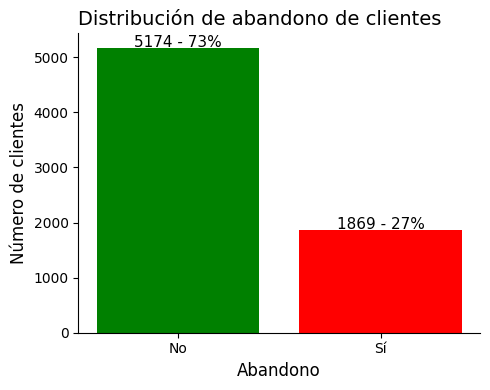

In [263]:
import matplotlib.pyplot as plt

si = len(filtro.query('Churn == "Yes"'))
no = len(filtro.query('Churn == "No"'))
total = len(filtro['Churn'])

fig, axs = plt.subplots(figsize=(5,4))
barras = axs.bar(['No', 'Sí'], [no, si], color=['green', 'red'])

# Añadir texto encima de cada barra
for barra in barras:
    altura = barra.get_height()
    axs.text(
        barra.get_x() + barra.get_width() / 2,
        altura + 10,                      # un poco arriba de la barra
        f'{int(altura)} - {((altura / total)*100):.0f}%',                 # texto (el valor entero)
        ha='center', fontsize=11
    )

axs.set_title("Distribución de abandono de clientes", fontsize=14, loc='left')
axs.set_xlabel('Abandono', fontsize=12)
axs.set_ylabel('Número de clientes', fontsize=12)
axs.xaxis.set_tick_params(labelsize=10)
axs.yaxis.set_tick_params(labelsize=10)
#elimina partes del recuadro
axs.spines['top'].set_visible(False)
axs.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()


# Recuento de evasión por variables categóricas

In [312]:
contrato = pd.crosstab(filtro['Contract'], filtro['Churn'], normalize='index').reset_index()
soporte = pd.crosstab(filtro['TechSupport'], filtro['Churn'], normalize='index').reset_index()
servicio_internet = pd.crosstab(filtro['InternetService'], filtro['Churn'], normalize='index').reset_index()
metodo_pago = pd.crosstab(filtro['PaymentMethod'], filtro['Churn'], normalize='index').reset_index()
factura_electronica = pd.crosstab(filtro['PaperlessBilling'], filtro['Churn'], normalize='index').reset_index()

In [300]:
import plotly.express as px
contrato_melted = contrato.melt(id_vars='Contract',
                                 value_vars=['No', 'Yes'],
                                 var_name='Abandono',
                                 value_name='Proporcion')

# Multiplicar los valores por 100 para obtener porcentajes
contrato_melted['Proporcion'] = contrato_melted['Proporcion'] * 100

# Crear el gráfico
fig = px.bar(contrato_melted,
             x='Contract',
             y='Proporcion',
             color='Abandono',
             title='Proporción de abandono por Tipo de Contrato',
             labels={'Contract': 'Tipo de Contrato', 'Proporcion': 'Porcentaje de Clientes'},
             text=contrato_melted['Proporcion'].round(0).astype(int).astype(str) + '%')

fig.update_layout(barmode='stack')
fig.show()


In [308]:
soporte_melted = soporte.melt(id_vars='TechSupport',
                              value_vars=['No','Yes'],
                              var_name='Abandono',
                              value_name='Proporcion')
soporte_melted['Proporcion'] = soporte_melted['Proporcion'] * 100

fig = px.bar(soporte_melted,
             x='TechSupport',
             y='Proporcion',
             color='Abandono',
             title='Proporción de abandono por Soporte Técnico',
             labels={'TechSupport': 'Soporte Técnico', 'Proporcion': 'Porcentaje de Clientes'},
             text=soporte_melted['Proporcion'].round(0).astype(int).astype(str) + '%')
fig.update_layout(barmode='stack')
fig.show()

In [320]:
servicio_internet_melted = servicio_internet.melt(id_vars='InternetService',
                                                  value_vars=['No','Yes'],
                                                  var_name='Abandono',
                                                  value_name='Proporcion')
servicio_internet_melted['Proporcion'] = servicio_internet_melted['Proporcion'] * 100

fig = px.bar(servicio_internet_melted,
             x='InternetService',
             y='Proporcion',
             color='Abandono',
             title='Proporción de abandono por Internet',
             labels={'InternetService': 'Internet', 'Proporcion': 'Porcentaje de Clientes'},
             text=servicio_internet_melted['Proporcion'].round(0).astype(int).astype(str) + '%')
fig.update_layout(barmode='stack')
fig.show()

In [318]:

# Transformar el DataFrame al formato largo
metodo_pago_melted = metodo_pago.melt(
    id_vars='PaymentMethod',
    value_vars=['No', 'Yes'],
    var_name='Abandono',
    value_name='Proporcion'
)

# Convertir a porcentajes
metodo_pago_melted['Proporcion'] = metodo_pago_melted['Proporcion'] * 100

# Crear gráfico de barras
fig = px.bar(
    metodo_pago_melted,
    x='PaymentMethod',
    y='Proporcion',
    color='Abandono',
    title='Proporción de abandono por Método de Pago',
    labels={'PaymentMethod': 'Método de Pago', 'Proporcion': 'Porcentaje de Clientes'},
    text=metodo_pago_melted['Proporcion'].round(0).astype(int).astype(str) + '%'
)

fig.update_layout(barmode='stack')
fig.show()

In [319]:
factura_melted = factura_electronica.melt(
    id_vars='PaperlessBilling',
    value_vars=['No', 'Yes'],
    var_name='Abandono',
    value_name='Proporcion'
)

# Convertir a porcentajes
factura_melted['Proporcion'] = factura_melted['Proporcion'] * 100

# Crear gráfico de barras
fig = px.bar(
    factura_melted,
    x='PaperlessBilling',
    y='Proporcion',
    color='Abandono',
    title='Proporción de abandono según uso de Factura Electrónica',
    labels={'PaperlessBilling': '¿Factura Electrónica?', 'Proporcion': 'Porcentaje de Clientes'},
    text=factura_melted['Proporcion'].round(0).astype(int).astype(str) + '%'
)

fig.update_layout(barmode='stack')
fig.show()

# Conteo de evasión por variables numéricas

In [321]:
fig = px.box(
    filtro,
    y='tenure',
    x='Churn',
    color='Churn',
    title='Distribución del tiempo de contrato según evasión (Box Plot)',
    labels={'tenure': 'Tiempo de contrato (meses)', 'Churn': 'Canceló el servicio'}
)

fig.show()

In [322]:
fig = px.histogram(
    filtro,
    x='tenure',
    color='Churn',
    barmode='overlay',  # También puedes usar 'group'
    nbins=30,
    opacity=0.6,
    title='Distribución del tiempo de contrato por estado de evasión',
    labels={'tenure': 'Tiempo de contrato (meses)', 'Churn': 'Canceló el servicio'}
)

fig.show()


In [329]:
fig = px.box(
    filtro,
    y='Charges.Total',
    x='Churn',
    color='Churn',
    title='Distribución del total gastado por los clientes (Box Plot)',
    labels={'Charges.Total': 'Total gastado ($)', 'Churn': 'Canceló el servicio'}
)

fig.show()

In [343]:
fig = px.histogram(
    filtro,
    x='Charges.Total',
    color='Churn',
    nbins=40,
    barmode='overlay',
    opacity=0.6,
    title='Distribución del total gastado por clientes según evasión',
    labels={
        'Charges.Total': 'Total gastado ($)',
        'Churn': 'Canceló el servicio'
    }
)

fig.show()


In [344]:
df_corr = filtro.copy()
df_corr['Churn'] = df_corr['Churn'].map({'Yes': 1, 'No': 0})


In [346]:
correlaciones = df_corr.corr(numeric_only=True)
correlaciones['Churn'].sort_values(ascending=False)

,Churn
Churn,1.000000
Charges.Monthly,0.193356
Cuentas_diarias,0.193356
Charges.Total,-0.198324
tenure,-0.352229


In [352]:

fig = px.imshow(
    correlaciones,
    text_auto='.2f',
    aspect="auto",
    color_continuous_scale='RdBu_r',
    title="Matriz de correlación"
)
fig.show()

# 📊 Informe Final: Análisis de Evasión de Clientes en Telecom_X

## 🧾 Introducción

Este informe presenta el análisis exploratorio del conjunto de datos de la empresa **Telecom_X**, con el objetivo de identificar factores que influyen en la **evasión de clientes** (churn). El propósito es entender los patrones que pueden llevar a un cliente a abandonar la compañía.

---

## 📁 Descripción del Conjunto de Datos

El dataset incluye información sobre los clientes y sus servicios contratados. Entre las principales columnas se encuentran:

- `customerID`: ID único del cliente
- `Churn`: si el cliente abandonó la empresa
- `gender`: género
- `SeniorCitizen`: si el cliente es mayor de 65 años
- `Partner`: si tiene pareja
- `Dependents`: si tiene personas a cargo
- `tenure`: meses de permanencia en la empresa
- `PhoneService`, `InternetService`, `TechSupport`, etc.
- `Charges.Monthly`: cargo mensual
- `Charges.Total`: gasto total
- `PaymentMethod`: forma de pago
- `PaperlessBilling`: si recibe factura electrónica
- `Contract`: tipo de contrato

---

## 🔍 Variables Analizadas

Se analizaron las siguientes variables clave para entender el comportamiento de abandono:

- `tenure`
- `Contract`
- `Charges.Monthly`
- `Charges.Total`
- `TechSupport`
- `OnlineSecurity`
- `PaymentMethod`
- `PaperlessBilling`

---

## 📈 Hallazgos Clave

- **Duración del Contrato (`tenure`)**:
  - Clientes con poca permanencia tienen mayor probabilidad de abandono.

- **Tipo de Contrato**:
  - Contratos mensuales presentan tasas de churn más altas comparados con contratos anuales o bianuales.

- **Servicios Adicionales**:
  - La ausencia de `TechSupport` está asociada a mayor abandono.

- **Internet**:
  - Los clientes que no tienen servicio de internet son menos propensos al abandono

- **Metodo de pago**:
  - Los clientes que pagan de manera automatica tienden a cancelar menos los servicios de la empresa


- **Facturación**:
  - La facturación electrónica (`PaperlessBilling`) se asocia con mayor probabilidad de abandono.

---

## 📌 Conclusiones

- Los clientes con **menor tiempo de permanencia** representan el grupo más vulnerable al abandono, lo cual sugiere que los primeros meses son críticos para fidelizar.

- Los **contratos mensuales** muestran una relación directa con tasas más altas de cancelación, en contraste con los contratos de mayor duración.

- La **falta de soporte técnico (`TechSupport`)** se asocia con una mayor tasa de abandono, lo que indica que el acompañamiento técnico influye en la percepción del servicio.

- Curiosamente, los **clientes sin servicio de internet** abandonan menos, lo que podría indicar un perfil más conservador o de bajo consumo que permanece estable.

- El uso de **métodos de pago automáticos** (como domiciliaciones bancarias o tarjetas de crédito) está correlacionado con una mayor retención de clientes.

- La **facturación electrónica (`PaperlessBilling`)** aparece como un posible factor de riesgo en la retención, lo que sugiere que puede estar ligada a clientes menos comprometidos o más propensos a la rotación.

---

## ✅ Recomendaciones

1. **Implementar estrategias de fidelización en los primeros meses**, como descuentos escalonados, beneficios exclusivos o acompañamiento personalizado.

2. **Incentivar contratos a largo plazo** mediante promociones o beneficios exclusivos que hagan menos atractiva la cancelación del servicio.

3. **Incluir `TechSupport` como parte de los paquetes básicos o reforzar su promoción**, especialmente a nuevos clientes.

4. **Analizar el perfil de usuarios sin internet**, ya que su menor tasa de abandono puede representar oportunidades para ofrecer nuevos servicios sin riesgo de fuga.

5. **Promover activamente los métodos de pago automáticos** como parte de la estrategia de fidelización y simplificación del proceso de pago.

6. **Evaluar la comunicación y experiencia asociada a `PaperlessBilling`**, buscando formas de hacerla más cercana, personalizada y con alertas proactivas para mejorar la retención.

